In [1]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

In [2]:
path_to_db = '/datasets/telecomm_csi.db'
engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

In [3]:
query = """
WITH
 
u AS
(SELECT lt_day, nps_score, user_id, age, gender_segment, os_name, cpe_type_name, location_id, age_gr_id, tr_gr_id, lt_gr_id,
     CASE
        WHEN lt_day < 365 THEN 'new'
        WHEN lt_day >= 365 THEN 'not_new'
 
    END AS is_new,
     CASE
        WHEN nps_score <= 6 THEN 'detractors'
        WHEN nps_score >=7 AND nps_score <=8 THEN 'passives'
        WHEN nps_score >=9 THEN 'promoters'
    END AS nps_group,
     CASE
        WHEN gender_segment=1.0 THEN 'f'
        WHEN gender_segment=0.0 THEN 'm'
    END AS gender_segment_1
FROM user),
 
l AS
(SELECT country, city, location_id
FROM location 
),
 
a_s AS 
(SELECT age_gr_id, title
FROM age_segment
),
 
t_s AS
(SELECT tr_gr_id, title
FROM traffic_segment
),
 
l_s AS
(SELECT lt_gr_id, title
FROM lifetime_segment
)
SELECT u.user_id,
       u.lt_day,
       u.is_new,
       u.age,
       u.gender_segment_1,
       u.os_name,
       u.cpe_type_name,
       l.country,
       l.city,
       SUBSTR(a_s.title,4) AS age_segment,
       SUBSTR(t_s.title,4) AS traffic_segment,
       SUBSTR(l_s.title,4) AS lifetime_segment,
       u.nps_score,
       u.nps_group
FROM u
JOIN l ON u.location_id=l.location_id
JOIN a_s ON u.age_gr_id=a_s.age_gr_id
JOIN t_s ON u.tr_gr_id=t_s.tr_gr_id
JOIN l_s ON u.lt_gr_id=l_s.lt_gr_id
 
"""

In [4]:
df = pd.read_sql(query, engine)
display(df.head(50))

,user_id,lt_day,is_new,age,gender_segment_1,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,not_new,45.0,f,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,promoters
1,A001WF,2344,not_new,53.0,m,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,promoters
2,A003Q7,467,not_new,57.0,m,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,promoters
3,A004TB,4190,not_new,44.0,f,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,promoters
4,A004XT,1163,not_new,24.0,m,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,promoters
5,A005O0,5501,not_new,42.0,f,ANDROID,SMARTPHONE,Россия,Омск,35-44,5-10,36+,6,detractors
6,A0061R,1236,not_new,45.0,m,ANDROID,SMARTPHONE,Россия,Уфа,45-54,10-15,36+,10,promoters
7,A009KS,313,new,35.0,m,ANDROID,SMARTPHONE,Россия,Москва,35-44,45-50,7-12,10,promoters
8,A00AES,3238,not_new,36.0,f,ANDROID,SMARTPHONE,Россия,СанктПетербург,35-44,1-5,36+,10,promoters
9,A00F70,4479,not_new,54.0,f,ANDROID,SMARTPHONE,Россия,Волгоград,45-54,15-20,36+,9,promoters


In [5]:
df.to_csv('telecomm_csi_tableau.csv', index=False)

### Укажите ссылку на дашборд на сайте Tableau Public:

https://public.tableau.com/views/nps_16658457450820/sheet11?:language=en-US&:display_count=n&:origin=viz_share_link

lifetime_segment                     1     13-24         2     25-36  \
gender_segment_1 age_segment                                           
f                16-24             NaN  0.087361  0.245045  0.019798   
                 25-34        1.000000  0.214059  0.316308  0.145153   
                 35-44        0.333333  0.332435  0.450846  0.277917   
                 45-54        1.000000  0.438341  0.516770  0.360275   
                 55-64             NaN  0.518766  0.644828  0.475520   
                 66 +              NaN  0.565394  0.540000  0.559633   
                 n/a          1.000000  0.500000       NaN -0.333333   
                 до 16             NaN  0.017857  0.500000  0.076923   
m                16-24             NaN  0.059398  0.182390 -0.030520   
                 25-34        0.000000  0.153785  0.285943  0.087561   
                 35-44        0.333333  0.308812  0.371588  0.217884   
                 45-54        1.000000  0.376032  0.536913  0.311503   
                 55-64        1.000000  0.427167  0.393548  0.392430   
                 66 +              NaN  0.473451  0.673913  0.387205   
                 n/a          0.000000 -0.333333 -1.000000 -1.000000   
                 до 16             NaN  0.041096  0.000000 -0.092308   

lifetime_segment                     3       36+       4-6      7-12  
gender_segment_1 age_segment                                          
f                16-24        0.236111 -0.065762  0.271100  0.164977  
                 25-34        0.359766  0.027744  0.319668  0.291300  
                 35-44        0.431775  0.175038  0.449479  0.390759  
                 45-54        0.584877  0.300104  0.546698  0.484736  
                 55-64        0.555066  0.417602  0.584660  0.583396  
                 66 +         0.531915  0.536269  0.537143  0.640898  
                 n/a               NaN -0.285714       NaN  1.000000  
                 до 16        0.111111 -0.106383  0.222222  0.200000  
m                16-24        0.211240 -0.104258  0.205832  0.186634  
                 25-34        0.291468 -0.042019  0.274569  0.237321  
                 35-44        0.400000  0.100904  0.375661  0.368573  
                 45-54        0.493590  0.223342  0.417763  0.448566  
                 55-64        0.540146  0.334850  0.572482  0.469546  
                 66 +         0.696970  0.437282  0.573913  0.544444  
                 n/a               NaN -0.538462 -0.500000 -1.000000  
                 до 16        0.357143 -0.286765  0.058824  0.000000

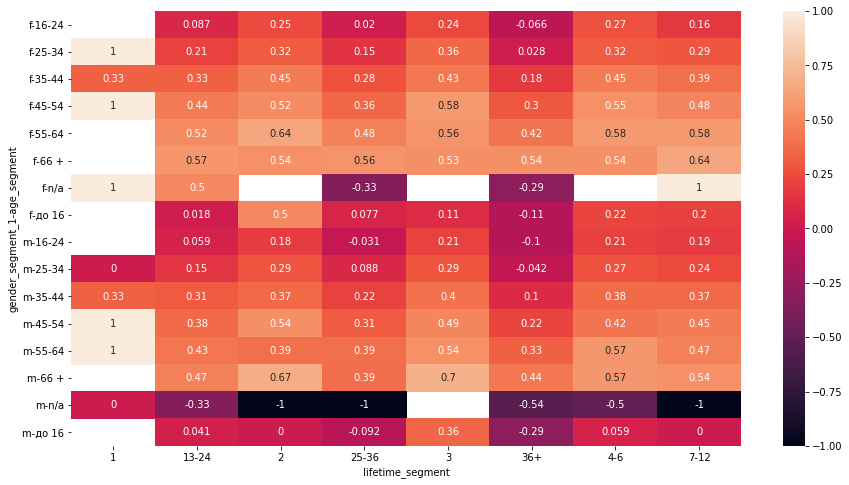

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
d = df.assign(total_nps=lambda row: row['nps_group'].map({'promoters': 1, 'passives': 0, 'detractors': -1}))\
  .pivot_table(index=['gender_segment_1', 'age_segment'], columns=['lifetime_segment'], values='total_nps', aggfunc='mean')
display(d)
plt.figure(figsize=(15,8))
sns.heatmap(d, annot=True);

### Укажите ссылку на pdf-файл с презентацией:

https://disk.yandex.ru/i/NNf1gkXC9C9_sg